In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [18]:
df = pd.read_csv('time_series.csv', index_col=["time"], parse_dates=True)

In [19]:
df.head()

,visits
time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


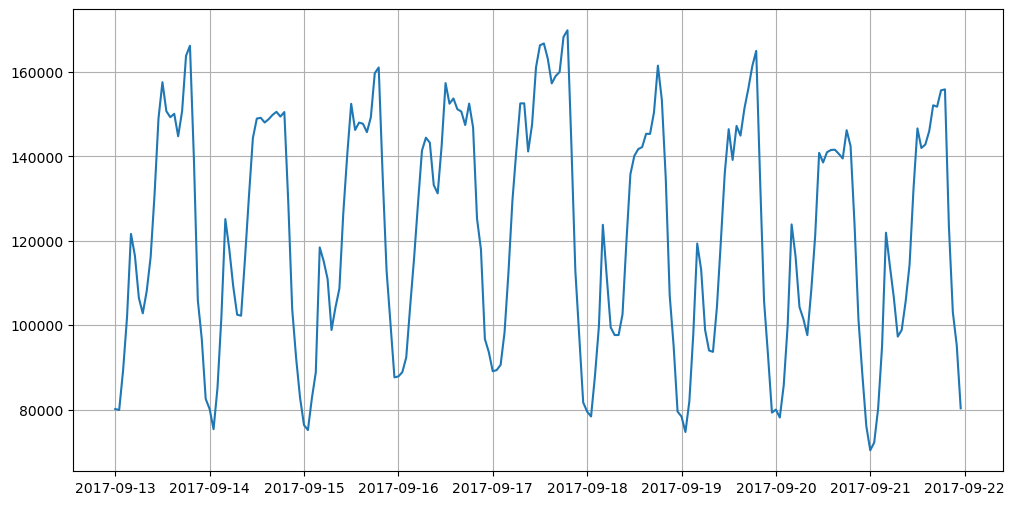

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.visits)
plt.grid(True)
plt.show()

In [21]:
from statsmodels.tsa.stattools import acf  # автокорреляционная функция
import statsmodels.tsa.api as smt  # для упрощённого построения

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
print('D-F p-value: ', adfuller(df)[1])

D-F p-value:  4.44480368862237e-10


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
parts = seasonal_decompose(df)

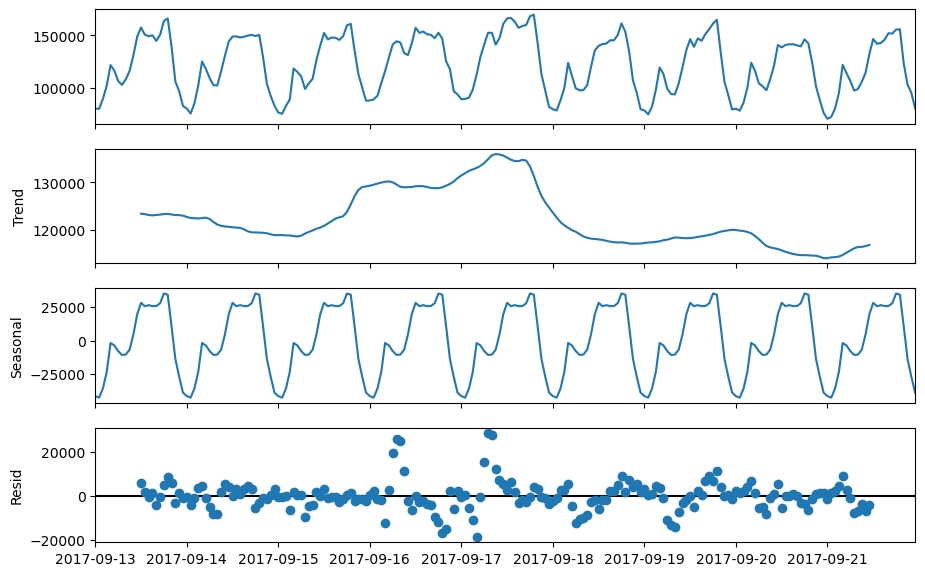

In [26]:
fig = parts.plot()
fig.set_size_inches(10, 6)
plt.show()

In [46]:
# Функция для обнаружения и обработки выбросов
def detect_and_replace_outliers(data, column):
    # Рассчитываем квартили и IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Определяем границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Находим выбросы (True/False маска)
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    # Получаем таблицу с выбросами (если нужно вывести)
    outliers = data[outliers_mask]
    
    # Подсчитываем количество выбросов
    num_outliers = outliers_mask.sum()
    
    # Заменяем выбросы на среднее значение (без учета выбросов)
    mean_value = data[column].mean()
    data.loc[outliers_mask, column] = mean_value
    
    return outliers, num_outliers, data

In [47]:
outliers_df, num_outliers, df_clean = detect_and_replace_outliers(df, 'visits')

In [48]:
print("Количество выбросов:", num_outliers)
print("\nТаблица выбросов:")
print(outliers_df)

Количество выбросов: 0

Таблица выбросов:
Empty DataFrame
Columns: [visits]
Index: []


In [49]:
def doubleExpSmoothing(df, alpha, beta):
    smoothed = [df['visits'].iloc[0]]
    
    for n in range(1, len(df)):
        if n == 1:
            level = df['visits'].iloc[0]
            trend = df['visits'].iloc[1] - df['visits'].iloc[0]
            smoothed.append(level + trend)
        else:
            value = df['visits'].iloc[n]
            last_level = level
            level = alpha * value + (1 - alpha) * (level + trend)
            trend = beta * (level - last_level) + (1 - beta) * trend
            smoothed.append(level + trend)

    tmp_df = df.copy()
    tmp_df['smoothed'] = smoothed

    plt.figure(figsize=(15, 5))
    plt.title(f"Double exponential smoothing, alpha = {alpha}, beta = {beta}")
    plt.plot(tmp_df['visits'], label="Time series")
    plt.plot(tmp_df['smoothed'], "orange", label="Double exponential smoothing")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

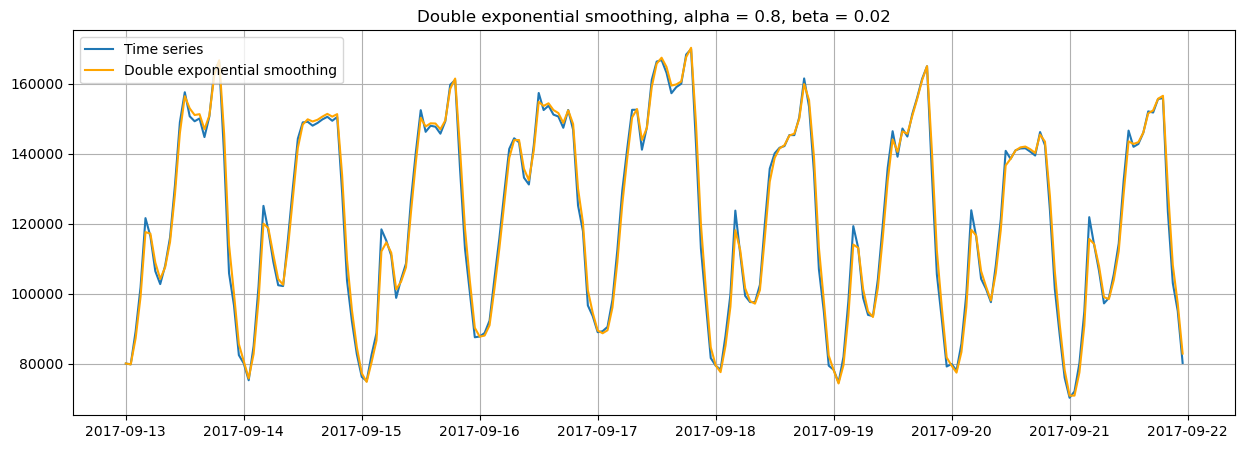

In [78]:
doubleExpSmoothing(df, 0.8, 0.02)